**Королев Егор Владимирович  
М8О-401Б-18  
Лабораторная работа #2  
Вариант №1**

# Постановка задачи

Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h$.

Исходное уравнение с начально-краевыми условиями:

$$
\left\{
\begin{aligned}
& \dfrac{\partial^2 u}{\partial t^2} = a^2 \dfrac{\partial^2 u}{\partial x^2},~a^2>0\\
& u(0,t) = -\sin(a \cdot t)\\
& u(\pi,t) = \sin(a \cdot t)\\
& u(x,0) = \sin(x)\\
& u_t(x,0) = -a\cos(x)\\
\end{aligned}
\right.
$$

Аналитическое решение системы:

$$u(x,t) = \sin(x - a \cdot t)$$

# Решение

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Функции, задающие начально-краевые условия и аналитическое решение:

In [2]:
def boundary_condition_1(t, a = 1.0):
    return -math.sin(a * t)

def boundary_condition_2(t, a = 1.0):
    return math.sin(a * t)

def initial_condition_1(x, a = 1.0):
    return math.sin(x)

def initial_condition_2(x, a = 1.0):
    return -a * math.cos(x)

def d2_initial_condition_1_dx2(x, a = 1.0):
    return -math.sin(x)

def analytical_solution(x, t, a = 1.0):
    return math.sin(x - a * t)

Построим конечно-разностную схему по $t\in[0,T]$ и $x\in[0,l]$ с шагами $\tau,~h$, соответственно. Тогда количество шагов определяются следующими соотношениями: $h = l / (N-1),~~ \tau = T / (K-1)$.

Пусть $u_i^k = u(x_i,t_k)$

## Явная конечно-разностная схема

Аппроскимируем производные:

$$
\begin{aligned}
& u_{tt}(x_j,t_k) = \dfrac{u_{j}^{k+1} - 2u_j^k + u_{j}^{k-1}}{\tau^2}\\
& u_{xx}(x_j,t_k) = \dfrac{u_{j+1}^{k} - 2u_j^k + u_{j-1}^{k}}{h^2}\\
\end{aligned}
$$

Подставим полученные выражения в исходное уравнение:

$$\dfrac{u_{j}^{k+1} - 2u_j^k + u_{j}^{k-1}}{\tau^2} = a^2 \dfrac{u_{j+1}^{k} - 2u_j^k + u_{j-1}^{k}}{h^2} + O(\tau^2 + h^2)$$

Обозначим $\sigma = \left( \dfrac{a\tau}{h} \right)^2$ и выразим из предыдущего уравнения $u_j^{k+1}$:

$$u_j^{k+1} = 2u_j^k (1 - \sigma) + \sigma (u_{j+1}^k + u_{j-1}^k) - u_j^{k-1} + \tau^2 O(\tau^2 + h^2)$$

Явная схема устойчива с условием $\sigma < 1$

## Неявная конечно-разностная схема

Апроксимируем вторую производную $u_xx$ (3) по значениям верхнего временного слоя времени $t_{k+1}$:

$$
\begin{aligned}
& u_{tt}(x_j,t_k) = \dfrac{u_{j}^{k+1} - 2u_j^k + u_{j}^{k-1}}{\tau^2}\\
& u_{xx}(x_j,t_k) = \dfrac{u_{j-1}^{k+1} - 2u_j^{k+1} + u_{j+1}^{k+1}}{h^2}\\
\end{aligned}
$$

Подставим полученные выражения в исходное уравнение:

$$\dfrac{u_{j}^{k+1} - 2u_j^k + u_{j}^{k-1}}{\tau^2} = a^2 \dfrac{u_{j-1}^{k+1} - 2u_j^{k+1} + u_{j+1}^{k+1}}{h^2} + O(\tau + h^2)$$

Решить данную систему можно с помощью метода прогонки. Приведем уравнение (7) к каноническому виду уравнения прогонки:

$$a_j \cdot u_{j-1}^{k+1} + b_j \cdot u_{j}^{k+1} + c_j \cdot u_{j+1}^{k+1} = d_j,~~j=\overline{1,N-1}$$

Где $a_j = 1,~~b_j = -2-1/\sigma,~~c_j = 1,~~d_j = (u_{j}^{k-1} - 2u_{j}^{k})/\sigma$

Первое и последние уравнения определяются с помощью граничных условий исходной сиситемы

Неявная схема устойчива абсолютно

## Программная реализация явной конечно-разностной схемы

In [3]:
def explicit_finite_difference_scheme(l_start = 0.0, l_finish = math.pi, N = 30, t_start = 0.0, t_finish = 1.0, K = 300, a = 1.0):
    N = N - 1
    K = K - 1
    h = (l_finish - l_start) / N
    tau = (t_finish - t_start) / K
    sigma = a * a * tau * tau / (h * h)
    if sigma > 1.0:
        print("sigma > 1.0")
    X = []
    T = []
    ans = []
    
    x = list(np.linspace(l_start, l_finish, N))
    ans.append(list(map(initial_condition_1, x, len(x)*[a])))
    ans.append(list(map(lambda lam: initial_condition_1(lam, a) + tau*initial_condition_2(lam, a) + a*a*tau*tau*d2_initial_condition_1_dx2(lam, a)/2, x)))
    X = [x, x]
    T.append([0.0 for _ in x])
    T.append([tau for _ in x])
    
    for t in np.linspace(t_start + 2*tau, t_finish, K):
        ans_last_line_1 = ans[-1]
        ans_last_line_2 = ans[-2]
        ans_line = [None for _ in ans_last_line_1]
        for i in range(1, len(x) - 1):
            ans_line[i] = 2 * (1 - sigma) * ans_last_line_1[i]
            ans_line[i] += sigma * (ans_last_line_1[i+1] + ans_last_line_1[i-1])
            ans_line[i] -= ans_last_line_2[i]
        ans_line[0] = boundary_condition_1(t, a)
        ans_line[-1] = boundary_condition_2(t, a)
        
        ans.append(ans_line)
        X.append(x)
        T.append([t for _ in x])
    
    return X, T, ans

## Программная реализация неявной конечно-разностной схемы

In [4]:
def race_method(A, b):
    P = [-item[2] for item in A]
    Q = [item for item in b]

    eps = 0.0
    if A[0][1] == 0: # регуляризация
        eps = 1e-10
    P[0] /= (A[0][1] + eps)
    Q[0] /= (A[0][1] + eps)

    for i in range(1, len(b)):
        z = (A[i][1] + A[i][0] * P[i-1])
        P[i] /= (z + eps)
        Q[i] -= A[i][0] * Q[i-1]
        Q[i] /= (z + eps)

    x = [item for item in Q]

    for i in range(len(x) - 2, -1, -1):
        x[i] += P[i] * x[i + 1]

    return x

In [5]:
def implicit_finite_difference_scheme(l_start = 0.0, l_finish = math.pi, N = 30, t_start = 0.0, t_finish = 1.0, K = 300, a = 1.0):
    N = N - 1
    K = K - 1
    h = (l_finish - l_start) / N
    tau = (t_finish - t_start) / K
    sigma = a * a * tau * tau / (h * h)
    X = []
    T = []
    ans = []
    
    x = list(np.linspace(l_start, l_finish, N+1))
    ans.append(list(map(initial_condition_1, x, len(x)*[a])))
    ans.append(list(map(lambda lam: initial_condition_1(lam, a) + tau*initial_condition_2(lam, a) + a*a*tau*tau*d2_initial_condition_1_dx2(lam, a)/2, x)))
    X = [x, x]
    T.append([0.0 for _ in x])
    T.append([tau for _ in x])
    
    for t in np.linspace(t_start + 2*tau, t_finish, K):
        ans_last_line_1 = ans[-1]
        ans_last_line_2 = ans[-2]
        coeff_a = 1
        coeff_b = -2 - 1 / sigma
        
        A = [
            (coeff_a, coeff_b, coeff_a)
            for _ in range(1, len(x)-1)
        ]
        coeff_d = [
            (ans_last_line_2[i] - 2 * ans_last_line_1[i]) / sigma
            for i in range(1, len(x) - 1)
        ]
        A.insert(0, (0, coeff_b, coeff_a))
        coeff_d.insert(0, (boundary_condition_1(t-tau, a) - 2*boundary_condition_1(t, a)) / sigma)
        
        A.append((coeff_a, coeff_b, 0))
        coeff_d.append((boundary_condition_2(t-tau, a) - 2*boundary_condition_2(t, a)) / sigma)
        
        ans.append(race_method(A, coeff_d))
        X.append(x)
        T.append([t for _ in x])
    
    return X, T, ans

# Вычисление погрешностей методов

Вычисление ошибки (норма матрицы ошибки):

In [6]:
def norm_matrix_error(x, t, approx, real_func, param_a = 1.0):
    ans = 0.0
    for i in range(len(approx)):
        for j in range(len(approx[i])):
            ans += (approx[i][j] - real_func(x[i][j], t[i][j], param_a))**2
    return ans**0.5

In [7]:
def error_plot_data(solver, real_f, a = 1.0):
    h, e = [], []
    for N in range(5, 100):
        # используется зависимость K = 20 * N для выполнения условия стабилизации a*a*tau*tau / (h*h) <= 1.0
        x, t, ans = solver(N=N, K = 20 * N, a=a)
        #print(matrix_error(x, t, ans, analytical_solution))
        h.append(1.0 / N)
        e.append(norm_matrix_error(x, t, ans, real_f, a))
    return h, e

In [8]:
def construct_error_plot(method, method_name):
    plt.figure(figsize = (16, 8))

    plt.title("Зависимость погрешности от длины шага")
    h, e = error_plot_data(method, analytical_solution)
    
    plt.plot(h, e, label=method_name, color = "blue")
    plt.xlabel("мелкость разбиения")
    plt.ylabel("ошибка")
    plt.legend()
    plt.grid()

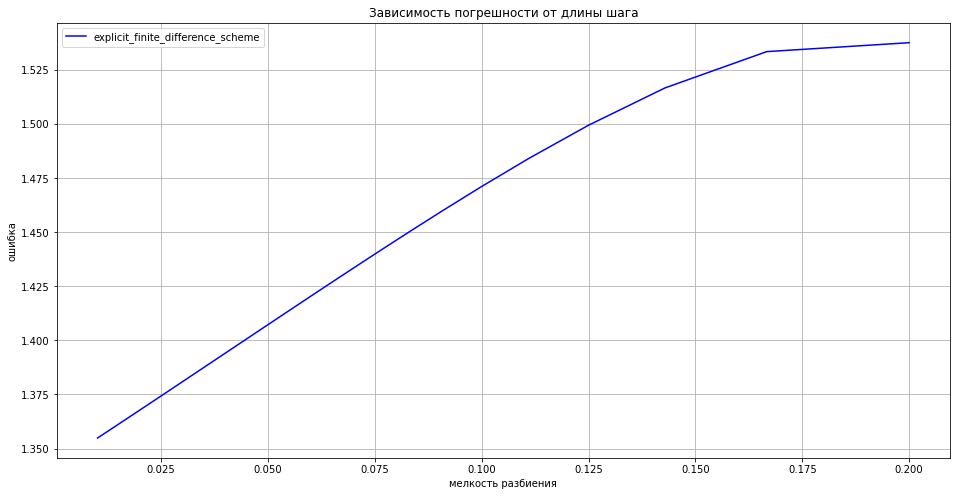

In [9]:
construct_error_plot(explicit_finite_difference_scheme, "explicit_finite_difference_scheme")

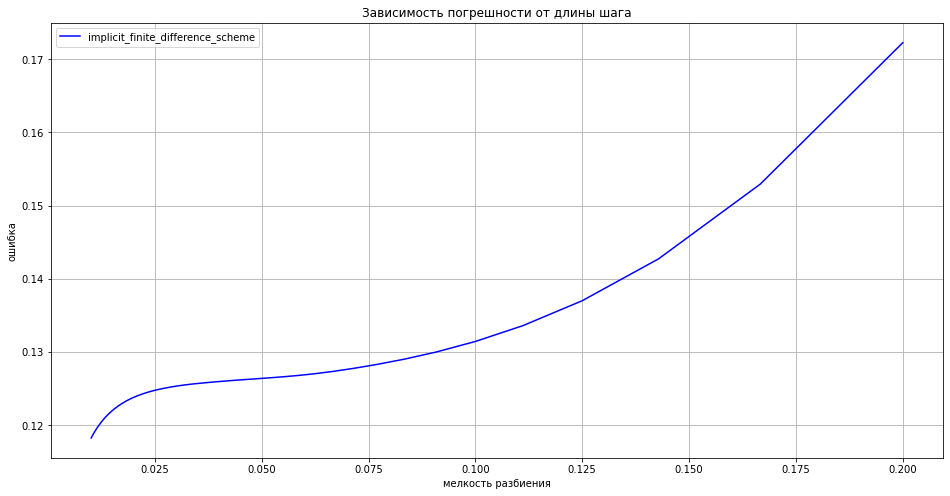

In [10]:
construct_error_plot(implicit_finite_difference_scheme, "implicit_finite_difference_scheme")

In [11]:
def construct_3d_plot(method, method_name):
    X_e, T_e, approx_e = method()
    z_plot = []
    for j in range(0, len(X_e), 1):
        tmp = []
        for i in range(0, len(X_e[j]), 1):
            tmp.append(analytical_solution(X_e[j][i], T_e[j][i]))
        z_plot.append(tmp)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_e, T_e, approx_e, label="alalytical")
    ax.scatter(X_e, T_e, z_plot, label=method_name)

    plt.legend()
    plt.grid()

    print("Total error = ", norm_matrix_error(X_e, T_e, approx_e, analytical_solution))

Total error =  1.0221272402012815


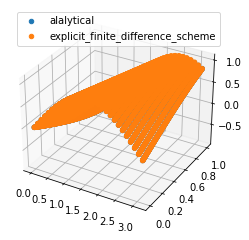

In [12]:
construct_3d_plot(explicit_finite_difference_scheme, "explicit_finite_difference_scheme")

Total error =  0.17202436861043016


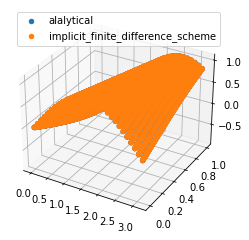

In [13]:
construct_3d_plot(implicit_finite_difference_scheme, "implicit_finite_difference_scheme")

# Выводы

Используя явную и неявную конечно-разностные схемы, была решена начально-краевая задача в частных производных гиперболического типа. Для проверки точности реализованных методов были построены графики суммарной ошибки от мелкости разбиения, также были построены 3D графики для аналитического решения и приближенного.